In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data read

In [2]:
#read data file
df = pd.read_csv('../../../data/init_enrollment-2010-2012/PreprocessedSubjects_new.csv')

print('Size of dataframe = ', df.shape)
df.head(5)


Size of dataframe =  (25759, 366)


/home/kali/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,58,97,346,361,363) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PtID,ParticipantFormType,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,...,InsLevemir,InsLantus,InsOther,InsUnk,InsNotTaking,AgeAtConsent,DiagAge,Pt_v3NumERVisOthReas,Pt_v3NumHospOthReas,Pt_v3NumSHSeizComa
0,3963,Self,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,0,0,0,36.0876,24,0,0,0
1,7428,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,10.1465,4,0,0,0
2,15755,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,10.1465,2,0,0,0
3,1489,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,9.1745,4,0,0,0
4,12505,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,0,0,0,0,58.1684,24,0,0,0


In [3]:
df['DKAPast12mos'].unique()

array(['2.No', '3.Unknown', '1.Yes'], dtype=object)

In [4]:
list_uni = []
for i in df.columns:
    if (0 not in df[i].unique() and (1. in df[i].unique()) and (df[i].unique().size == 2) ):
        list_uni.append(i)

df.update(df[list_uni].fillna(0))

#### Count null value percentage in each column

In [5]:
# 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
#                'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
#                'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns'
df['Pt_CeliacDr'].value_counts()

2.No            17800
1.Yes             869
3.Don't know      266
Name: Pt_CeliacDr, dtype: int64

<AxesSubplot:>

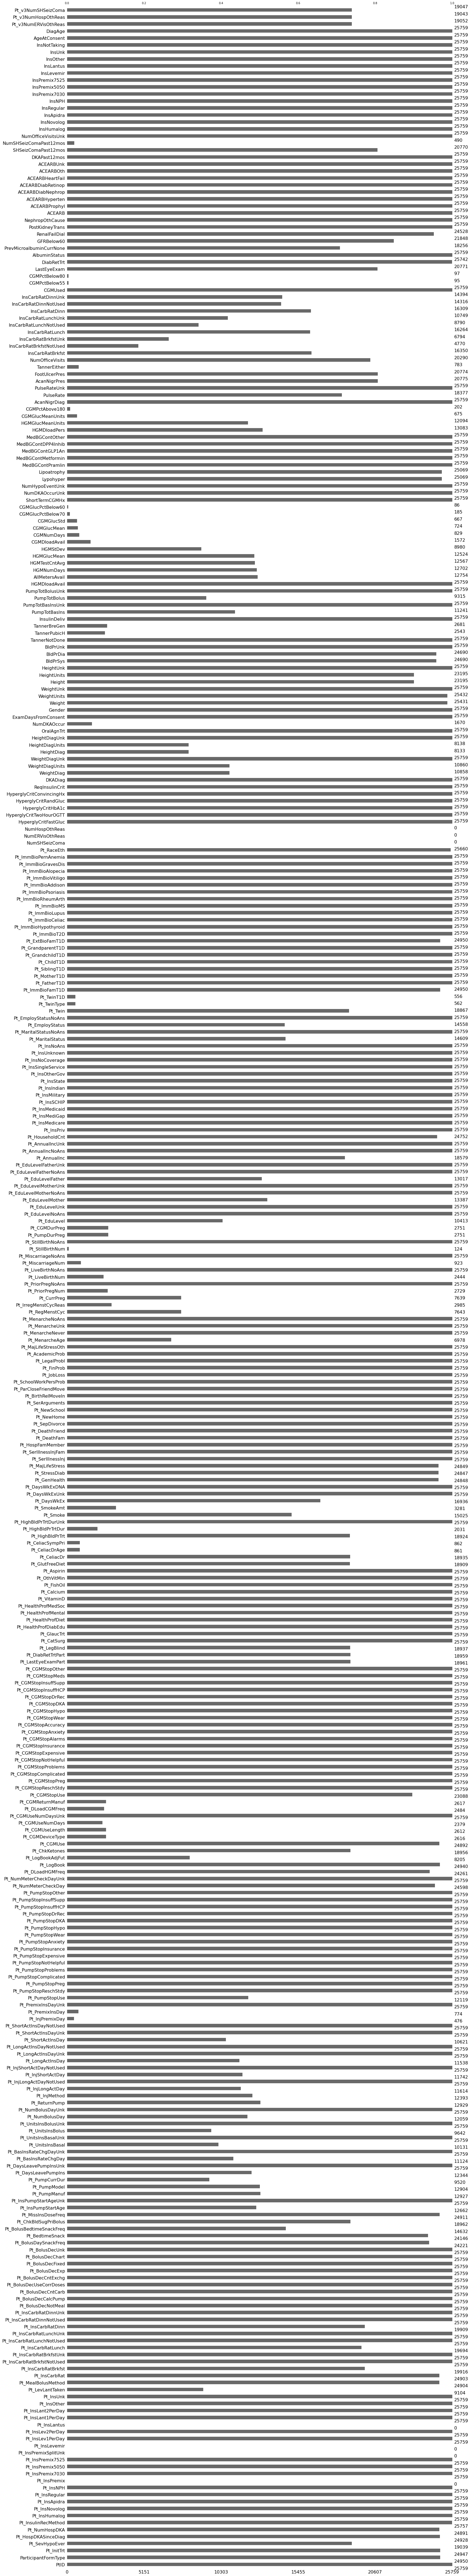

In [6]:
# missing values
import missingno as msno
msno.bar(df)

In [7]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# get missing values < threshold feature name list
variables = df.columns
thresh = 60
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))

print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'ParticipantFormType', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag', 'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH', 'Pt_InsPremix7030', 'Pt_InsPremix5050', 'Pt_InsPremix7525', 'Pt_InsLev1PerDay', 'Pt_InsLev2PerDay', 'Pt_InsLant1PerDay', 'Pt_InsLant2PerDay', 'Pt_InsOther', 'Pt_InsUnk', 'Pt_MealBolusMethod', 'Pt_InsCarbRat', 'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatBrkfstNotUsed', 'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatLunchNotUsed', 'Pt_InsCarbRatLunchUnk', 'Pt_InsCarbRatDinn', 'Pt_InsCarbRatDinnNotUsed', 'Pt_InsCarbRatDinnUnk', 'Pt_BolusDecNotMeal', 'Pt_BolusDecCalcPump', 'Pt_BolusDecCntCarb', 'Pt_BolusDecUseCorrDoses', 'Pt_BolusDecCntExchg', 'Pt_BolusDecExp', 'Pt_BolusDecFixed', 'Pt_BolusDecChart', 'Pt_BolusDecUnk', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack', 'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus', 'Pt_MissInsDoseFreq', 'Pt_InsPump

In [8]:
def add_stress_column(row):
    if(row['Pt_MajLifeStress'] == '1.Yes' or row['Pt_HospFamMember'] == 1 or row['Pt_DeathFam'] == 1 or
           row['Pt_DeathFriend'] == 1 or row['Pt_SepDivorce'] == 1 or row['Pt_NewHome'] == 1 or
           row['Pt_NewSchool'] == 1 or row['Pt_ParCloseFriendMove'] == 1 or row['Pt_SchoolWorkPersProb'] == 1 or
           row['Pt_JobLoss'] == 1 or row['Pt_FinProb'] == 1 or row['Pt_LegalProbl'] == 1 or
           row['Pt_AcademicProb'] == 1 or row['Pt_MajLifeStressOth'] == 1):
        val = 1
    else:
        val = 0
    return val

df['MajorLifeStressEvent'] = df.apply(add_stress_column, axis=1)


In [9]:
# add HbA1C values from hba1c data table

df_hba1c = pd.read_csv('../../../data/init_enrollment-2010-2012/PreprocessedHbA1c_new.csv')

df_hba1c['mean_hba1c'] = df_hba1c['HbA1c'].groupby(df_hba1c['PtID']).transform('mean')

df_hba1c = df_hba1c.loc[df_hba1c.groupby(['PtID'])['HbA1cMonthsFromConsent'].idxmax()]

df["HbA1c"] = df_hba1c.merge(df, on="PtID")["mean_hba1c"]
df

,PtID,ParticipantFormType,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,...,InsOther,InsUnk,InsNotTaking,AgeAtConsent,DiagAge,Pt_v3NumERVisOthReas,Pt_v3NumHospOthReas,Pt_v3NumSHSeizComa,MajorLifeStressEvent,HbA1c
0,3963,Self,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,0.0,1.0,0.0,...,0,0,0,36.0876,24,0,0,0,0,7.675000
1,7428,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,0.0,1.0,0.0,...,1,0,0,10.1465,4,0,0,0,0,6.750000
2,15755,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,0.0,1.0,0.0,...,1,0,0,10.1465,2,0,0,0,0,7.807692
3,1489,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,0.0,1.0,0.0,...,1,0,0,9.1745,4,0,0,0,0,7.535714
4,12505,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,0.0,0.0,...,0,0,0,58.1684,24,0,0,0,1,7.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,1.0,0.0,0.0,...,0,0,0,8.282,7,0,0,0,0,NaN
25755,21346,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,0.0,0.0,...,0,0,0,42.2669,8,1,1,0,0,NaN
25756,10925,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,1.0,0.0,...,0,0,0,8.8925,8,0,0,0,0,NaN
25757,25922,Self,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,0.0,1.0,0.0,...,0,0,0,31.2416,29,0,0,0,1,NaN


In [10]:
import math

# convert lbs to kg

for i, row in df.iterrows():
    weight = row['Weight']
    unit = row['WeightUnits']
    
    if (math.isnan(row['Weight'])):
        weight = weight
        unit = unit
    elif(row['WeightUnits']=='lbs' or (pd.isna(row['WeightUnits']) and row['Weight']> 200)):
        weight = weight/2.2046
        unit = 'kg'
    df.at[i,'Weight'] = weight
    df.at[i,'WeightUnits'] = unit


for i, row in df.iterrows():
    height = row['Height']
    unit = row['HeightUnits']
    
    if (math.isnan(row['Height'])):
        height = height
        unit = unit
    elif(row['HeightUnits']=='in' or (pd.isna(row['HeightUnits']) and row['Height']<50)):
        height = height * 2.54
        unit = 'cm'
    else:
        height = height
        unit = unit
    df.at[i,'Height'] = height/100
    df.at[i,'HeightUnits'] = unit


for i, row in df.iterrows():
    weight = row['WeightDiag']
    unit = row['WeightDiagUnits']
    
    if (math.isnan(row['WeightDiag'])):
        weight = weight
        unit = unit
    elif(row['WeightDiagUnits']=='lbs' or (pd.isna(row['WeightDiagUnits']) and row['WeightDiag']> 200)):
        weight = weight/2.2046
        unit = 'kg'
    df.at[i,'WeightDiag'] = weight
    df.at[i,'WeightDiagUnits'] = unit


for i, row in df.iterrows():
    height = row['HeightDiag']
    unit = row['HeightDiagUnits']
    
    if (math.isnan(row['HeightDiag'])):
        height = height
        unit = unit
    elif(row['HeightDiagUnits']=='in' or (pd.isna(row['HeightDiagUnits']) and row['HeightDiag']<50)):
        height = height * 2.54
        unit = 'cm'
    else:
        height = height
        unit = unit
    df.at[i,'HeightDiag'] = height/100
    df.at[i,'HeightDiagUnits'] = unit


def add_bmi(row):
    if(math.isnan(row['Height']) or math.isnan(row['Weight'])):
        val = np.nan
    else:
        val = row['Weight'] / (row['Height']**2)
#         print(row['DiagAge'], row['Weight'], row['WeightDiagUnits'], row['Height'])
    
    return val

df['bmi'] = df.apply(add_bmi, axis=1)

In [11]:
# add first degree relative with T1D column

def add_T1D_relative_column(row):
    if(row['Pt_TwinT1D'] == 1 or row['Pt_ImmBioFamT1D'] == 1 or row['Pt_FatherT1D'] == 1 or
           row['Pt_MotherT1D'] == 1 or row['Pt_SiblingT1D'] == 1 or row['Pt_ChildT1D'] == 1 or
           row['Pt_GrandchildT1D'] == 1 or row['Pt_GrandparentT1D'] == 1 or row['Pt_ExtBioFamT1D'] == 1):
        val = 1
    else:
        val = 0
    return val

df['relative_T1D'] = df.apply(add_T1D_relative_column, axis=1)


Drop columns that have high null value percentage

In [12]:
cols_to_del = ['Pt_LevLantTaken', 'Pt_InsCarbRatBrkfstNotUsed','NumHypoEventUnk','Pt_CeliacDr',
               'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunchNotUsed', 'Pt_InsCarbRatLunchUnk',
               'Pt_InsCarbRatDinnNotUsed', 'Pt_InsCarbRatDinnUnk', 'Pt_BolusDecNotMeal',
               'Pt_BolusDecCalcPump', 'Pt_BolusDecUseCorrDoses', 'Pt_BolusDecCntExchg','NumOfficeVisitsUnk',
               'Pt_BolusDecExp', 'Pt_BolusDecFixed', 'Pt_BolusDecChart', 'Pt_BolusDecUnk',
               'Pt_InsPumpStartAgeUnk', 'Pt_PumpCurrDur', 'Pt_DaysLeavePumpInsUnk', 'Pt_BasInsRateChgDayUnk',
               'Pt_UnitsInsBasal', 'Pt_UnitsInsBolus', 'Pt_ShortActInsDayUnk', 'Pt_ShortActInsDayNotUsed', 
               'Pt_InjPremixDay', 'Pt_PremixInsDay', 'Pt_PremixInsDayUnk', 'Pt_PumpStopReschStdy',
               'Pt_PumpStopPreg', 'Pt_PumpStopComplicated', 'Pt_PumpStopProblems', 'Pt_PumpStopNotHelpful',
               'Pt_PumpStopExpensive', 'Pt_PumpStopInsurance', 'Pt_PumpStopAnxiety', 'Pt_PumpStopWear',
               'Pt_PumpStopHypo', 'Pt_PumpStopDKA', 'Pt_PumpStopDrRec', 'Pt_PumpStopInsuffHCP', 
               'Pt_PumpStopInsuffSupp', 'Pt_PumpStopOther', 'Pt_NumMeterCheckDayUnk', 'Pt_LogBookAdjFut',
               'Pt_CGMDeviceType', 'Pt_CGMUseLength', 'Pt_CGMUseNumDays', 'Pt_CGMUseNumDaysUnk',
               'Pt_DLoadCGMFreq', 'Pt_CGMReturnManuf', 'Pt_CGMStopReschStdy', 'Pt_CGMStopPreg',
               'Pt_CGMStopComplicated', 'Pt_CGMStopProblems', 'Pt_CGMStopNotHelpful', 'Pt_CGMStopExpensive',
               'Pt_CGMStopInsurance', 'Pt_CGMStopAlarms', 'Pt_CGMStopAnxiety', 'Pt_CGMStopAccuracy', 
               'Pt_CGMStopWear', 'Pt_CGMStopHypo', 'Pt_CGMStopDKA', 'Pt_CGMStopDrRec', 'Pt_CGMStopInsuffHCP',
               'Pt_CGMStopInsuffSupp', 'Pt_CGMStopMeds', 'Pt_CGMStopOther', 'Pt_CatSurg', 'Pt_GlaucTrt', 
               'Pt_HealthProfDiet', 'Pt_HealthProfMental', 'Pt_HealthProfMedSoc', 'Pt_VitaminD',
               'Pt_Calcium', 'Pt_FishOil', 'Pt_OthVitMin', 'Pt_Aspirin', 'Pt_CeliacDrAge', 'Pt_CeliacSympPri',
               'Pt_HighBldPrTrtDur', 'Pt_HighBldPrTrtDurUnk', 'Pt_DaysWkExUnk', 'Pt_DaysWkExDNA',
               'Pt_SerIllnessInj', 'Pt_SerIllnessInjFam', 'Pt_SerArguments', 'Pt_BirthRelMoveIn',
               'Pt_MenarcheNever', 'Pt_MenarcheUnk','Pt_MenarcheNoAns','Pt_PriorPregNum',
               'Pt_PriorPregNoAns', 'Pt_LiveBirthNum', 'Pt_LiveBirthNoAns', 'Pt_UnitsInsBasalUnk',
               'Pt_MiscarriageNoAns', 'Pt_StillBirthNum', 'Pt_StillBirthNoAns', 'Pt_PumpDurPreg', 
               'Pt_CGMDurPreg', 'Pt_EduLevelNoAns', 'Pt_EduLevelUnk', 'Pt_EduLevelMotherNoAns',
               'Pt_EduLevelMotherUnk', 'Pt_EduLevelFatherNoAns', 'Pt_EduLevelFatherUnk', 'Pt_AnnualIncNoAns',
               'Pt_AnnualIncUnk', 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
               'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
               'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns', 'Pt_MaritalStatusNoAns', 'Pt_EmployStatusNoAns',
               'Pt_TwinType', 'Pt_ImmBioT2D', 'Pt_ImmBioHypothyroid', 'Pt_ImmBioCeliac','Pt_LongActInsDayUnk',
               'Pt_ImmBioLupus', 'Pt_ImmBioMS', 'Pt_ImmBioRheumArth', 'Pt_ImmBioPsoriasis', 'Pt_ImmBioAddison', 
               'Pt_ImmBioVitiligo', 'Pt_ImmBioAlopecia', 'Pt_ImmBioGravesDis', 'Pt_ImmBioPernAnemia', 
               'NumERVisOthReas', 'NumHospOthReas', 'HyperglyCritFastGluc','Pt_UnitsInsBolusUnk',
               'HyperglyCritTwoHourOGTT', 'HyperglyCritConvincingHx', 'HeightDiag', 'HeightDiagUnits', 'WeightUnk', 'HeightUnk', 'BldPrUnk', 'TannerPubicH', 'TannerBreGen',
               'PumpTotBasInsUnk', 'PumpTotBolus', 'PumpTotBolusUnk', 'HGMStDev', 'CGMDloadAvail', 'CGMNumDays',
               'CGMGlucMean', 'CGMGlucStd', 'ShortTermCGMHx', 'WeightDiagUnits','InsCarbRatLunchUnk',
               'NumDKAOccurUnk', 'MedBGContPramlin', 'MedBGContMetformin', 'MedBGContGLP1An',
               'MedBGContDPP4Inhib', 'MedBGContOther', 'CGMGlucMeanUnits', 'CGMPctAbove180', 'PulseRateUnk', 
               'TannerEither', 'InsCarbRatBrkfstNotUsed', 'InsCarbRatBrkfstUnk', 'InsCarbRatLunchNotUsed', 'InsCarbRatDinnUnk',
               'WeightUnits', 'HeightUnits', 'HGMGlucMeanUnits', 'ParticipantFormType','ACEARBProphyl', 'ACEARBHyperten',
               'ACEARBDiabNephrop', 'ACEARBDiabRetinop', 'ACEARBHeartFail','HGMDloadAvail','HGMDloadPers','InsUnk',
               'ACEARBOth', 'ACEARBUnk','AllMetersAvail', 'HeightDiagUnk', 'WeightDiagUnk', 'Pt_UnitsInsBolusUnk',
               'Pt_MajLifeStress', 'Pt_HospFamMember', 'Pt_DeathFam', 'Pt_DeathFriend','Pt_SepDivorce','Pt_NewHome',
               'Pt_NewSchool','Pt_ParCloseFriendMove','Pt_SchoolWorkPersProb','Pt_JobLoss','Pt_FinProb','Pt_LegalProbl',
               'Pt_AcademicProb', 'Pt_MajLifeStressOth', 'Pt_TwinT1D', 'Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D',
               'Pt_SiblingT1D', 'Pt_ChildT1D', 'Pt_GrandchildT1D', 'Pt_Twin', 'NumSHSeizComa', 'Pt_InsPremix',
               'Pt_InsPremix5050','Pt_InsPremixSplitUnk','Pt_InsLevemir', 'Pt_InsLantus',
               'Pt_GrandparentT1D', 'Pt_ExtBioFamT1D',
               # remove patient mentiend insulin since it has another field which is reported by clinic
               
               'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH', 'Pt_InsPremix7030',
                'Pt_InsPremix7525','Pt_InsOther'
               
               

]

# for i in list_uni:
#     if(i in cols_to_del):
#         print(i)

In [13]:
# Drop unwanted columns from initial enrolment data - 
# cols_to_del = ['Pt_LevLantTaken','NumHypoEventUnk',
#                'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunchUnk',
#                'Pt_InsCarbRatDinnUnk',
#                'NumOfficeVisitsUnk',
#                'Pt_InsPumpStartAgeUnk', 'Pt_PumpCurrDur', 'Pt_DaysLeavePumpInsUnk', 'Pt_BasInsRateChgDayUnk',
#                'Pt_UnitsInsBasal', 'Pt_UnitsInsBolus', 'Pt_ShortActInsDayUnk', 
#                'Pt_InjPremixDay', 'Pt_PremixInsDay', 'Pt_PremixInsDayUnk', 'Pt_PumpStopReschStdy',
#                'Pt_PumpStopPreg', 'Pt_PumpStopComplicated', 'Pt_PumpStopProblems', 'Pt_PumpStopNotHelpful',
#                'Pt_PumpStopExpensive', 'Pt_PumpStopInsurance', 'Pt_PumpStopAnxiety', 'Pt_PumpStopWear',
#                'Pt_PumpStopHypo', 'Pt_PumpStopDKA', 'Pt_PumpStopDrRec', 'Pt_PumpStopInsuffHCP', 
#                'Pt_PumpStopInsuffSupp', 'Pt_PumpStopOther', 'Pt_NumMeterCheckDayUnk', 'Pt_LogBookAdjFut',
#                'Pt_CGMDeviceType', 'Pt_CGMUseLength', 'Pt_CGMUseNumDays', 'Pt_CGMUseNumDaysUnk',
#                'Pt_DLoadCGMFreq', 'Pt_CGMReturnManuf', 'Pt_CGMStopReschStdy', 'Pt_CGMStopPreg',
#                'Pt_CGMStopComplicated', 'Pt_CGMStopProblems', 'Pt_CGMStopNotHelpful', 'Pt_CGMStopExpensive',
#                'Pt_CGMStopInsurance', 'Pt_CGMStopAlarms', 'Pt_CGMStopAnxiety', 'Pt_CGMStopAccuracy', 
#                'Pt_CGMStopWear', 'Pt_CGMStopHypo', 'Pt_CGMStopDKA', 'Pt_CGMStopDrRec', 'Pt_CGMStopInsuffHCP',
#                'Pt_CGMStopInsuffSupp', 'Pt_CGMStopMeds', 'Pt_CGMStopOther',
#                'Pt_CeliacDrAge', 'Pt_CeliacSympPri',
#                'Pt_HighBldPrTrtDur', 'Pt_HighBldPrTrtDurUnk', 'Pt_DaysWkExUnk', 'Pt_DaysWkExDNA',
#                'Pt_SerArguments', 'Pt_BirthRelMoveIn',
#                'Pt_MenarcheNever', 'Pt_MenarcheUnk','Pt_MenarcheNoAns','Pt_PriorPregNum',
#                'Pt_PriorPregNoAns', 'Pt_LiveBirthNum', 'Pt_LiveBirthNoAns', 'Pt_UnitsInsBasalUnk',
#                'Pt_MiscarriageNoAns', 'Pt_StillBirthNum', 'Pt_StillBirthNoAns', 'Pt_PumpDurPreg', 
#                'Pt_CGMDurPreg', 'Pt_EduLevelNoAns', 'Pt_EduLevelUnk', 'Pt_EduLevelMotherNoAns',
#                'Pt_EduLevelMotherUnk', 'Pt_EduLevelFatherNoAns', 'Pt_EduLevelFatherUnk', 'Pt_AnnualIncNoAns',
#                'Pt_AnnualIncUnk', 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
#                'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
#                'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns', 'Pt_MaritalStatusNoAns', 'Pt_EmployStatusNoAns',
#                'Pt_TwinType', 'Pt_ImmBioT2D', 'Pt_ImmBioHypothyroid', 'Pt_ImmBioCeliac','Pt_LongActInsDayUnk',
#                'Pt_ImmBioLupus', 'Pt_ImmBioMS', 'Pt_ImmBioRheumArth', 'Pt_ImmBioPsoriasis', 'Pt_ImmBioAddison', 
#                'Pt_ImmBioVitiligo', 'Pt_ImmBioAlopecia', 'Pt_ImmBioGravesDis', 'Pt_ImmBioPernAnemia', 
#                'NumERVisOthReas', 'NumHospOthReas','Pt_UnitsInsBolusUnk',
#                'HeightDiag', 'HeightDiagUnits', 'WeightUnk', 'HeightUnk', 'BldPrUnk', 'TannerPubicH', 'TannerBreGen',
#                'PumpTotBasInsUnk', 'PumpTotBolus', 'PumpTotBolusUnk', 'HGMStDev', 'CGMDloadAvail', 'CGMNumDays',
#                'CGMGlucMean', 'CGMGlucStd', 'ShortTermCGMHx', 'WeightDiagUnits','InsCarbRatLunchUnk',
#                'NumDKAOccurUnk', 'MedBGContPramlin', 'MedBGContMetformin', 'MedBGContGLP1An',
#                'MedBGContDPP4Inhib', 'MedBGContOther', 'CGMGlucMeanUnits', 'CGMPctAbove180', 'PulseRateUnk', 
#                'TannerEither', 'InsCarbRatBrkfstNotUsed', 'InsCarbRatBrkfstUnk', 'InsCarbRatLunchNotUsed', 'InsCarbRatDinnUnk',
#                'WeightUnits', 'HeightUnits', 'HGMGlucMeanUnits', 'ParticipantFormType','ACEARBProphyl', 'ACEARBHyperten',
#                'ACEARBDiabNephrop', 'ACEARBDiabRetinop', 'ACEARBHeartFail','HGMDloadAvail','HGMDloadPers','InsUnk',
#                'ACEARBOth', 'ACEARBUnk','AllMetersAvail', 'HeightDiagUnk', 'WeightDiagUnk', 'Pt_UnitsInsBolusUnk',
#                'Pt_MajLifeStress', 'Pt_HospFamMember', 'Pt_DeathFam', 'Pt_DeathFriend','Pt_SepDivorce','Pt_NewHome',
#                'Pt_NewSchool','Pt_ParCloseFriendMove','Pt_SchoolWorkPersProb','Pt_JobLoss','Pt_FinProb','Pt_LegalProbl',
#                'Pt_AcademicProb', 'Pt_MajLifeStressOth', 'Pt_TwinT1D', 'Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D',
#                'Pt_SiblingT1D', 'Pt_ChildT1D', 'Pt_GrandchildT1D', 'Pt_Twin', 'NumSHSeizComa', 'Pt_InsPremix',
#                'Pt_InsPremix5050','Pt_InsPremixSplitUnk','Pt_InsLevemir', 'Pt_InsLantus',
#                'Pt_GrandparentT1D', 'Pt_ExtBioFamT1D', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH', 'Pt_InsPremix7030',
#                 'Pt_InsPremix7525','Pt_InsOther']


df.drop(cols_to_del, inplace=True, axis=1)
df.head(10)
len(cols_to_del)


233

In [14]:

df.columns.to_numpy()



array(['PtID', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag',
       'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsLev1PerDay',
       'Pt_InsLev2PerDay', 'Pt_InsLant1PerDay', 'Pt_InsLant2PerDay',
       'Pt_InsUnk', 'Pt_MealBolusMethod', 'Pt_InsCarbRat',
       'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn',
       'Pt_BolusDecCntCarb', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack',
       'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus',
       'Pt_MissInsDoseFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf',
       'Pt_PumpModel', 'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay',
       'Pt_NumBolusDay', 'Pt_NumBolusDayUnk', 'Pt_ReturnPump',
       'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjLongActDayNotUsed',
       'Pt_InjShortActDay', 'Pt_InjShortActDayNotUsed',
       'Pt_LongActInsDay', 'Pt_LongActInsDayNotUsed', 'Pt_ShortActInsDay',
       'Pt_PumpStopUse', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq',
       'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUs

# Add Other medical conditions

In [15]:
# read medical condition data
df_med = pd.read_csv('../../../data/init_enrollment-2010-2012/PreprocessedMedical Conditions_new.csv')


In [16]:
# get id list of patients having specific medical condition

def get_ids_of_condition(df, label):
    df_a = df[df[label]==True]
    df_a=df_a.drop_duplicates(subset="PtID",keep="first") 
    return df_a.PtID.tolist()


In [17]:
medical_conditions = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke','Celiac',
                      'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
                      'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro',
                     
                     'IsletCellTrans','PancreasTrans','TIA','MyocardInf','CoronArt','Cardiomyopathy',
'PeriphVasc','PeriphVascClaud','AmputationToe','AmputationKnee',
'Hyperthyroid','Hypothyroid','GraveDisease','HashimotoDisease','AutoimAdrenal',
'AutoimPolyEndo','GastrB12Anem','IBD','Lupus',
'Sjogrens','Dermatomyo','ErectileSexDysfunc','CharcotJoint',
'OrthoHypotens','Tachycardia','Gastroparesis',
'ADHD','Bulimia','Anorexia','BulimiaAndAnorexia','BingeEating','EDNOS','InsulinRestWeightLoss',
'Vitiligo','NecroLipoidDiab','Psoriasis','Alopecia','DyslipUnspec','PCOS',
'CancBladder','CancBreast','CancColRect','CancEndo','CancKidney','CancLeuk','CancLung','CancMel','CancNonHod',
'CancPancr','CancPros','CancThyr','CancOth'
                      
                      
#                        'IsletCellTrans','PancreasTrans',
#                     'Hyperthyroid','Hypothyroid',
#                     'BingeEating','InsulinRestWeightLoss',
#                     'NecroLipoidDiab'
                     ]

def add_column(df,df_med, medical_conditions):
    for label in medical_conditions:
        patients_list = get_ids_of_condition(df_med, label)
        print("Count of patients with ",label,len(patients_list))
        df[label] = df['PtID'].isin(patients_list)
        
        # rename column labels
        new_label = label.replace(" ", "_") if (' ' in label) else label
        df.rename(columns={label:new_label}, inplace=True)
    return df

df = add_column(df,df_med, medical_conditions)


Count of patients with  CardiacAngio 105
Count of patients with  CoronaryBypass 177
Count of patients with  Hypertension 3475
Count of patients with  HighTrig 475
Count of patients with  HighLDL 2025
Count of patients with  LowHDL 213
Count of patients with  Stroke 74
Count of patients with  Celiac 1093
Count of patients with  Cardiomyopathy 55
Count of patients with  CongHeartFail 79
Count of patients with  AtrialFib 58
Count of patients with  CardiacArrhyth 76
Count of patients with  Hemoglob 16
Count of patients with  RheumArth 177
Count of patients with  Osteo 471
Count of patients with  Depression 1751
Count of patients with  Anxiety 692
Count of patients with  Psychosis 75
Count of patients with  DiabNeuro 1074
Count of patients with  IsletCellTrans 17
Count of patients with  PancreasTrans 55
Count of patients with  TIA 34
Count of patients with  MyocardInf 159
Count of patients with  CoronArt 413
Count of patients with  Cardiomyopathy 55
Count of patients with  PeriphVasc 151
Co

In [18]:
df

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CancEndo,CancKidney,CancLeuk,CancLung,CancMel,CancNonHod,CancPancr,CancPros,CancThyr,CancOth
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df_medicine = pd.read_csv('../../../data/init_enrollment-2010-2012/PreprocessedMedications_new.csv')
df_medicine['DrugName'].value_counts().head(35)

Thyroxine                   2772
Aspirin                     2096
Lisinopril                  1696
Simvastatin                 1632
atorvastatin                 924
Multivitamin preparation     844
Vitamin D                    804
Albuterol                    612
Glucagon                     565
Omeprazole                   537
Cetirizine                   494
Losartan                     432
Insulin Glargine             426
Insulin Lispro               418
fluticasone                  410
Insulin, Aspart, Human       408
Sertraline                   397
Hydrochlorothiazide          396
montelukast                  393
Metoprolol                   383
Bupropion                    367
Furosemide                   366
Fish Oils                    346
Enalapril                    340
Fluoxetine                   326
Ramipril                     325
rosuvastatin                 321
Metformin                    302
Citalopram                   299
Amlodipine                   298
gabapentin

In [20]:
# medicine_name = ['Losartan', 'Insulin Glargine','Insulin Lispro','fluticasone', 'Insulin, Aspart, Human',  
# 'Sertraline','Hydrochlorothiazide','montelukast','Metoprolol','Bupropion','Furosemide','Fish Oils','Enalapril',                   
# 'Fluoxetine','Ramipril','rosuvastatin','Metformin','Citalopram',                 
# 'Amlodipine','gabapentin','Pravastatin','ezetimibe','Escitalopram','fexofenadine']               

medicine_name = ['Insulin Glargine','Insulin Lispro','Hydrochlorothiazide','Sertraline', 'Hydrochlorothiazide', 'Insulin, Aspart, Human']
def get_ids_of_patients_medicine(df, label):
    
    df_a = df[df['DrugName']==label]
    df_a=df_a.drop_duplicates(subset="PtID",keep="first") 
    return df_a.PtID.tolist()

def add_column(df,df_medicine, medicine_name):
    for label in medicine_name:
        patients_list = get_ids_of_patients_medicine(df_medicine, label)
        print("Count of patients with ",label,len(patients_list))
        df[label] = df['PtID'].isin(patients_list)
        
        # rename column labels
        new_label = label.replace(" ", "_") if (' ' in label) else label
        new_label = new_label.replace(",", "") if (',' in new_label) else new_label
        
        df.rename(columns={label:new_label}, inplace=True)
    return df

df = add_column(df,df_medicine, medicine_name)
# df.drop('Insulin Aspart Human', inplace=True, axis=1)

Count of patients with  Insulin Glargine 426
Count of patients with  Insulin Lispro 418
Count of patients with  Hydrochlorothiazide 396
Count of patients with  Sertraline 396
Count of patients with  Hydrochlorothiazide 396
Count of patients with  Insulin, Aspart, Human 400


In [21]:
df

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CancNonHod,CancPancr,CancPros,CancThyr,CancOth,Insulin_Glargine,Insulin_Lispro,Hydrochlorothiazide,Sertraline,Insulin_Aspart_Human
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


# Convert variables - categories

In [22]:
# boolean values to 1,0
# bool_list = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke', 'Celiac',
#                       'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
#                       'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro']

# medicine_name = ['Losartan', 'Insulin_Glargine','Insulin_Lispro','fluticasone', 'Insulin_Aspart_Human',  
# 'Sertraline','Hydrochlorothiazide','montelukast','Metoprolol','Bupropion','Furosemide','Fish_Oils','Enalapril',                   
# 'Fluoxetine','Ramipril','rosuvastatin','Metformin','Citalopram',                 
# 'Amlodipine','gabapentin','Pravastatin','ezetimibe','Escitalopram','fexofenadine']  

medicine_name = ['Insulin_Glargine','Insulin_Lispro','Hydrochlorothiazide','Sertraline', 'Hydrochlorothiazide', 'Insulin_Aspart_Human']


bool_list = medical_conditions + medicine_name

def convert_bool(df, bool_list):
    for label in bool_list:
        df[label] = df[label].astype(int)
    return df

convert_bool(df, bool_list)

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CancNonHod,CancPancr,CancPros,CancThyr,CancOth,Insulin_Glargine,Insulin_Lispro,Hydrochlorothiazide,Sertraline,Insulin_Aspart_Human
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Object data type handle

In [23]:
# get possible values in column
def get_possible_vals(df, colName):
    list_val =df[colName].unique().tolist() 
    without_nan = [x for x in list_val if str(x) != 'nan']
    without_nan.sort()
    return without_nan


# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val

In [24]:
# handle special case - ageAtConsent has object type with floats and strings
df['AgeAtConsent'] = df['AgeAtConsent'].replace({'90 or older': 91})
df['AgeAtConsent'] = df['AgeAtConsent'].astype(float)


In [25]:
# insert diabDuration
# calculate and add new column of diab duration of patient
age_at_consent = df['AgeAtConsent']
diag_age = df["DiagAge"]
diagDuration = age_at_consent - diag_age

df['diagDuration'] = diagDuration

In [26]:

df['Diab_dur_greater'] = [1 if x>40 else 0 for x in df['diagDuration']]
df

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CancPros,CancThyr,CancOth,Insulin_Glargine,Insulin_Lispro,Hydrochlorothiazide,Sertraline,Insulin_Aspart_Human,diagDuration,Diab_dur_greater
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,12.0876,0
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.1465,0
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,8.1465,0
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,5.1745,0
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,34.1684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1.2820,0
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,34.2669,0
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0.8925,0
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,2.2416,0


In [27]:
# get parameter list with object type

obj_col_name_list = list(df.select_dtypes(['object']).columns)


In [28]:
# check parameters have common vatiables - ex 1. yes, yes etc

for i in obj_col_name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()


Pt_InitTrt ['2.Pill(s)/Oral medication', '1.Insulin given by injections, pen or pump', '3.Both pills and injections or pump', nan, "5.Don't Know", '4.Diet or no treatment']


Pt_SevHypoEver ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_HospDKASinceDiag ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_InsulinRecMethod ['1.Pump', '2.Injections/pens', '3.Pump and injections/pens', '5.Do not take insulin', '4.Sometimes pump and sometimes inj/pens', nan]


Pt_MealBolusMethod ['3.During meal', '1.Immediately before a meal', '6.Depends on glucose level prior to meal', nan, '2.Several minutes before a meal', '4.After meal', '5.Not given regularly']


Pt_InsCarbRat ['1.Yes', nan, '2.No', "3.Don't know"]


Pt_BolusDaySnackFreq ['5.Always', '4.Most of the time', '3.Sometimes', nan, '1.Never', '2.Rarely']


Pt_BedtimeSnack ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_BolusBedtimeSnackFreq

In [29]:
# remove Pt_ImmBioFamT1D and  Pt_ExtBioFamT1D , PregAtVisit because their values need to handle manually
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather', 'Pt_AnnualInc']

for l in name_list:
    obj_col_name_list.remove(l)


In [30]:
def swap_dict_vals_keys(d):
    dicts = {value:key for key, value in d.items()}
    return dicts


def create_unique_val_dict_and_replace(df, label):
    dicts = {}
    values = get_possible_vals(df, label)
    keys = range(len(values))
    
    for i in keys:
        dicts[i] = values[i]
    
    d = swap_dict_vals_keys(dicts)
    
    print(label   ,d)
    print()
    
    df[label] = df[label].replace(d)

    return df

for i in obj_col_name_list:
    df = create_unique_val_dict_and_replace (df, i)


Pt_InitTrt {'1.Insulin given by injections, pen or pump': 0, '2.Pill(s)/Oral medication': 1, '3.Both pills and injections or pump': 2, '4.Diet or no treatment': 3, "5.Don't Know": 4}

Pt_SevHypoEver {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_HospDKASinceDiag {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_InsulinRecMethod {'1.Pump': 0, '2.Injections/pens': 1, '3.Pump and injections/pens': 2, '4.Sometimes pump and sometimes inj/pens': 3, '5.Do not take insulin': 4}

Pt_MealBolusMethod {'1.Immediately before a meal': 0, '2.Several minutes before a meal': 1, '3.During meal': 2, '4.After meal': 3, '5.Not given regularly': 4, '6.Depends on glucose level prior to meal': 5}

Pt_InsCarbRat {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusDaySnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time': 3, '5.Always': 4}

Pt_BedtimeSnack {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusBedtimeSnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time

In [31]:
df


,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CancPros,CancThyr,CancOth,Insulin_Glargine,Insulin_Lispro,Hydrochlorothiazide,Sertraline,Insulin_Aspart_Human,diagDuration,Diab_dur_greater
0,3963,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,12.0876,0
1,7428,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.1465,0
2,15755,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,8.1465,0
3,1489,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,5.1745,0
4,12505,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,34.1684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,0.0,1.0,1.0,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1.2820,0
25755,21346,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,34.2669,0
25756,10925,0.0,1.0,1.0,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0.8925,0
25757,25922,0.0,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,2.2416,0


In [32]:
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather', 'Pt_HospDKASinceDiag', 'Pt_SevHypoEver',
            'Pt_AnnualInc']
for i in name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()

Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_BasInsRateChgDay ['4', '2', '1', '3', nan, '5', '0', '6', '8', '7', '9', '10', '> 10', 4.0, 2.0, 3.0, 6.0, 8.0, 7.0, 0.0, 9.0, 5.0, 1.0]


Pt_NumMeterCheckDay ['5', '9', '10', '6', '4', nan, '13', '2', '0', '3', '8', '1', '7', '18', '12', '11', '15', '> 19', '16', '14', '17', 4.0, 2.0, 9.0, 12.0, 7.0, 5.0, 8.0, 6.0, 3.0, 1.0, 10.0, 14.0, 15.0, 11.0, 0.0, 18.0, 13.0, 17.0, '19']


NumDKAOccur [nan, '1', '2', '0', '6-Mar', '25-Nov', '>= 5', '3', '4', '10-Jul']


NumSHSeizComaPast12mos [nan, 1.0, 2.0, 3.0, 4.0, '3', '1', '2', '0', '>= 5', '4']


Pt_v3NumERVisOthReas [0.0, nan, 1.0, 2.0, 4.0, 3.0, 5.0, 8.0, 7.0, '0', '1', '3', '6', '2', '4', '5', '> 9', '8', '9', '7', 9.0, 6.0]


Pt_v3NumHospOthReas ['0', nan, '1', '2', '7', '3', '8', '4', '> 9', '6', '5', '9']


Pt_v3NumSHSeizComa ['0', nan, '1', '> 9', '4', '3', '8', '2', '6', '7', '5', '9']


Pt_EduLevel ["12.Bachelo

In [33]:

def replace_manually(df,label, replace_val, new_val):
    df[label] = df[label].replace({replace_val: new_val })
    df[label] = df[label].astype(float)
    return df
    
df=replace_manually(df,'Pt_v3NumSHSeizComa', '> 9', 10)
df=replace_manually(df,'Pt_v3NumHospOthReas', '> 9', 10)
df=replace_manually(df,'Pt_v3NumERVisOthReas', '> 9', 10)
df=replace_manually(df,'NumSHSeizComaPast12mos', '>= 5', 5)
df=replace_manually(df,'Pt_NumMeterCheckDay', '> 19', 20)
df=replace_manually(df,'Pt_BasInsRateChgDay', '> 10', 11)
df=replace_manually(df,'Pt_NumHospDKA', '> 9', 10)

df['NumDKAOccur'] = df['NumDKAOccur'].replace({'>= 5': 5, '6-Mar': 1, '25-Nov': 1, '10-Jul': 1 })
df['NumDKAOccur'] = df['NumDKAOccur'].astype(float)


In [34]:
# introduce new column cumulation of father_education, mother_educatio and pt_education

df['Pt_EduLevel'] = df['Pt_EduLevel'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })
df['Pt_EduLevelMother'] = df['Pt_EduLevelMother'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

df['Pt_EduLevelFather'] = df['Pt_EduLevelFather'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

# df['Pt_HospDKASinceDiag'] = df['Pt_HospDKASinceDiag'].replace({
#     '2.No': 0,
#     '1.Yes': 1,
#     '3.Don\'t know': 2
# })


df['Pt_AnnualInc'] = df['Pt_AnnualInc'].replace({
    '$100,000 or more':5,
    '$100,000 - less than $200,000': 6,
    '$200,000 or more':7,
    '$25,000 - $35,000': 1,
    '$35,000 - less than $50,000': 2,
    '$50,000 - less than $75,000': 3,
    '$75,000 - less than $100,000': 4,
    'Less than $25,000':0
})

# df['education_level'] = df[["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"]].max(axis=1)

# drop 
# df.drop(["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"], inplace=True, axis=1)

In [35]:
labels = []

In [36]:
# check for missed object column types
check_obj_col_type = list(df.select_dtypes(['object']).columns)
check_obj_col_type

[]

# Save preprocessed dataset in File

In [37]:
df.to_csv('data.csv',index=False)

# Calculations

In [38]:
# get the patients count - filtering age
def get_count_by_age(df, age):
    age_df = df[df['AgeAtConsent'] >= age]
    
    age_df=age_df.drop_duplicates(subset="PtID",keep="first") 
    print(f'Age {age}+ patient count  is -> {age_df.PtID.size}')


get_count_by_age(df, 26)


Age 26+ patient count  is -> 7324


In [39]:
# get the patients count - filtering age and diabetics duration

def get_count_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["AgeAtConsent"]>=age) & (df["diagDuration"]>diabDur)] 
    filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    return filter_patients


df_sub = get_count_by_age_diabDur(df, 26, 2)

Number of patients whos age is 26+ and diabetics duration greater than 2  is -> 7155


In [40]:

def get_occurence_count(df, label, num):
    data = df[(df[label]==num)] 
    data = data[(data["AgeAtConsent"]>=26) & (data["diagDuration"]>2)]
    data=data.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients who are older than 26 and has diab more than 2 yrs with {label}  is -> {data.PtID.size}')
    
get_occurence_count(df, 'SHSeizComaPast12mos',0.0)
# get_occurence_count(df, 'Pt_SHFlg',1)

Number of patients who are older than 26 and has diab more than 2 yrs with SHSeizComaPast12mos  is -> 205


In [41]:
# check missing values in SHSeizComaPast12mos
7155 - df_sub['SHSeizComaPast12mos'].isnull().sum()

5464

In [42]:
# check gender distribution of selected dataset  Gender {'F': 0, 'M': 1, 'T': 2}

temp_groupby = df_sub.groupby('Gender', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

   Gender  total
0       0   3894
1       1   3259
2       2      2


In [43]:
# Pt_RaceEth distribution {'1.White Non-Hispanic': 0, '2.Black Non-Hispanic': 1, '3.Hispanic or Latino': 2, '4.Native Hawaiian/Other Pacific Islander': 3, '5.Asian': 4, '6.American Indian/Alaskan Native': 5, '7.More than one race': 6}

temp_groupby = df_sub.groupby('Pt_RaceEth', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

   Pt_RaceEth  total
0         0.0   6494
1         1.0    248
2         2.0    207
3         3.0      6
4         4.0     62
5         5.0     21
6         6.0     92
